In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False
import seaborn as sns
import scipy.stats as stats

In [2]:
df_ROS = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')
df_ROS.head(4)

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.1,4,Up,0
2,2,3PT,53.0,3,NaN,0.0,0,0,1,0,...,0,67.5,27.3,10.2,0,-1.77,1749.0,4,Down,0
3,3,4PT,54.7,4,18.0,0.0,0,1,0,0,...,0,49.2,18.7,19.9,0,-1.58,1796.2,4,Down,0


In [3]:
df_ROS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1894 non-null   int64  
 1   환자ID                    1894 non-null   object 
 2   Large Lymphocyte        1894 non-null   float64
 3   Location of herniation  1894 non-null   int64  
 4   ODI                     462 non-null    float64
 5   가족력                     1843 non-null   float64
 6   간질성폐질환                  1894 non-null   int64  
 7   고혈압여부                   1894 non-null   int64  
 8   과거수술횟수                  1894 non-null   int64  
 9   당뇨여부                    1894 non-null   int64  
 10  말초동맥질환여부                1894 non-null   int64  
 11  빈혈여부                    1894 non-null   int64  
 12  성별                      1894 non-null   int64  
 13  스테로이드치료                 1894 non-null   int64  
 14  신부전여부                   1894 non-null   

## quest
- 선정 변수 : 체중, 재발여부, ?(범주형)
- 체중 검증(연속형)/ 범주형(2 항목)
- 연속형 , 범주형(정규/비정규) 분포
- 한쪽 범주형 분포 분석 완료 후 다른 분포 확인 후 인사이트 찾기

### 선정 변수 : 체중, 재발여부
- 분석 내용 : 체중에 따른 재발여부에 영향이 있는가?
    - 귀무가설 : 영향이 없다. 
    - 대립가설 : 영향이 있다.
- 분석 결론 (기준 : p-value 0.05)
    - 통계 결론 : pvalue=0.0 대립가설 참
    - 사실 결론 : 영향이 있다.

In [4]:
df_ROS_WA = df_ROS[['체중', '재발여부']]
df_ROS_WA

,체중,재발여부
0,60.3,0
1,71.7,0
2,77.1,0
3,74.2,0
4,80.7,0
...,...,...
1889,64.0,0
1890,59.0,0
1891,70.0,0
1892,77.0,0


In [5]:
df_ROS['재발여부'].value_counts()

0    1667
1     227
Name: 재발여부, dtype: int64

In [6]:
df_ROS_WA.isnull().sum()

체중      0
재발여부    0
dtype: int64

In [7]:
stats.shapiro(df_ROS_WA['재발여부'])

ShapiroResult(statistic=0.3786131739616394, pvalue=0.0)

<Axes: xlabel='재발여부', ylabel='Count'>

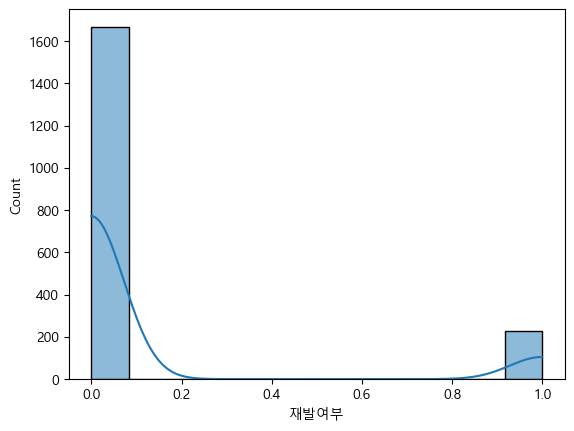

In [8]:
sns.histplot(data=df_ROS_WA, x='재발여부', kde=True)

In [9]:
stats.shapiro(df_ROS_WA['체중'])

ShapiroResult(statistic=0.9795888662338257, pvalue=8.319101268931405e-16)

<Axes: xlabel='체중', ylabel='Count'>

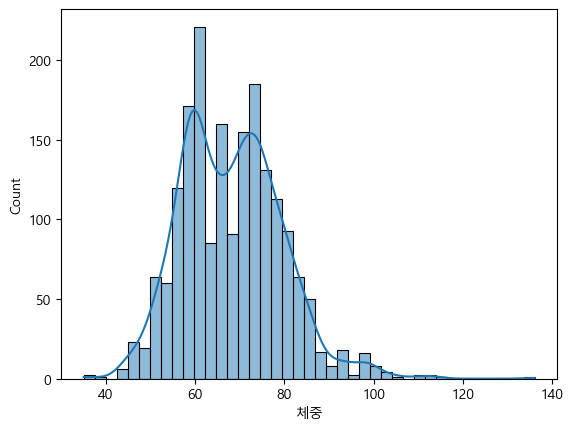

In [10]:
sns.histplot(data=df_ROS_WA, x='체중', kde=True)

In [11]:
# 검증
stats.ranksums(df_ROS_WA['체중'], df_ROS_WA['재발여부'])

RanksumsResult(statistic=53.293997766553495, pvalue=0.0)

### 선정 변수 : 체중, 직업
- 분석 내용 : 체중에 따른 직업에 영향을 끼치는가?
    - 귀무가설 : 영향을 끼치지 않는다.
    - 대립가설 : 영향을 끼친다.
- 분석 결론 (기준 : p-value 0.05)
    - 통계 결론 : 
    - 사실 결론 : 

In [12]:
df_ROS_WJ= df_ROS[['체중', '직업']]
df_ROS_WJ

,체중,직업
0,60.3,자영업
1,71.7,운동선수
2,77.1,특수전문직
3,74.2,주부
4,80.7,특수전문직
...,...,...
1889,64.0,무직
1890,59.0,사무직
1891,70.0,무직
1892,77.0,사무직


In [13]:
df_ROS_WJ.value_counts()

체중     직업 
63.0   사무직    16
65.0   사무직    16
75.0   사무직    16
60.0   주부     14
74.0   사무직    13
              ..
64.9   자영업     1
       학생      1
65.0   공무원     1
       예술가     1
136.1  자영업     1
Length: 790, dtype: int64

<Axes: xlabel='직업', ylabel='Count'>

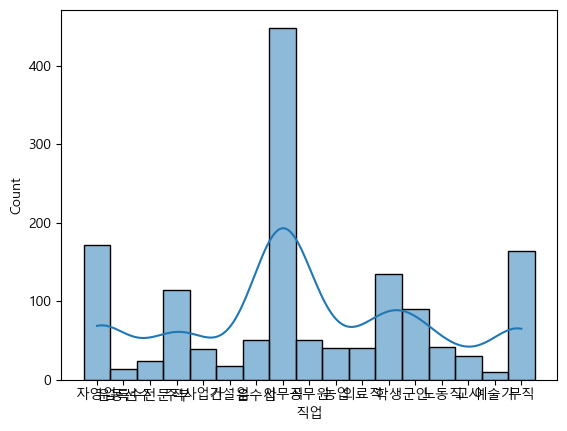

In [14]:
sns.histplot(data=df_ROS_WJ, x='직업', kde=True)

<Axes: xlabel='체중', ylabel='Count'>

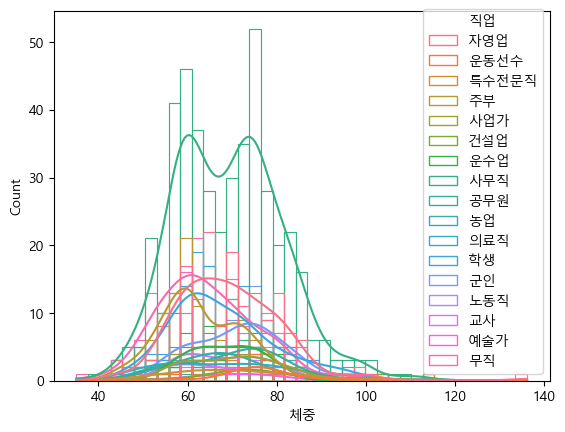

In [15]:
sns.histplot(data=df_ROS, x='체중', kde=True, hue='직업', fill=False)

In [16]:
df_ROS['직업'].isnull().sum()

415

In [17]:
df_ROS_dropna = df_ROS['직업'].dropna().copy()
df_ROS_dropna.isnull().sum()

0

In [54]:
# pd.DataFrame(iris['data'], columns=iris['feature_names'])
df_ROS_list = df_ROS_dropna.unique().tolist()
df_ROS_list

['자영업',
 '운동선수',
 '특수전문직',
 '주부',
 '사업가',
 '건설업',
 '운수업',
 '사무직',
 '공무원',
 '농업',
 '의료직',
 '학생',
 '군인',
 '노동직',
 '교사',
 '예술가',
 '무직']

In [19]:
df_ROS['직업'].describe()

count     1479
unique      17
top        사무직
freq       449
Name: 직업, dtype: object

In [50]:
conditions = (df_ROS['직업'] == '특수전문직') | (df_ROS['직업'] == '주부')
df_weigh_job = df_ROS[conditions][['체중','직업']]
df_weigh_job

,체중,직업
2,77.1,특수전문직
3,74.2,주부
4,80.7,특수전문직
15,75.6,주부
16,69.5,주부
...,...,...
1846,60.0,주부
1848,45.0,주부
1859,52.0,주부
1864,60.0,주부


In [21]:
df_first = df_weigh_job[df_weigh_job['직업'] == '특수전문직']
df_first

,체중,직업
2,77.1,특수전문직
4,80.7,특수전문직
99,60.6,특수전문직
263,67.5,특수전문직
451,76.1,특수전문직
495,60.9,특수전문직
601,70.8,특수전문직
680,60.0,특수전문직
940,52.0,특수전문직
955,70.0,특수전문직


In [22]:
df_second = df_weigh_job[df_weigh_job['직업'] == '주부']
df_second

,체중,직업
3,74.2,주부
15,75.6,주부
16,69.5,주부
36,58.2,주부
41,56.0,주부
...,...,...
1846,60.0,주부
1848,45.0,주부
1859,52.0,주부
1864,60.0,주부


In [51]:
df_result = []
for item in df_ROS_list :
    condition = (df_weigh_job['체중'] == item)
    df_result.append(df_weigh_job[condition])

In [52]:
df_result[0]

,체중,직업


In [46]:
condition

2       False
3       False
4       False
15      False
16      False
        ...  
1846    False
1848    False
1859    False
1864    False
1865    False
Name: 체중, Length: 137, dtype: bool

In [26]:
stats.levene(df_first['체중'], df_second['체중'])

LeveneResult(statistic=3.516060071327282, pvalue=0.061832579321597345)